<a href="https://colab.research.google.com/github/JSJeong-me/JBNU-2021/blob/main/Predictive_Analytics/decision_tree/4_LinearRegressionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [2]:
#importing data
df = pd.read_csv("./Data_USD.csv")

In [ ]:
df.head()

In [ ]:
df_features=df[['PAY_SCORE_AVG','PAY_AMT_AVG_US','CREDIT_UTILIZATION','BILL_AVG_US','AGE','DEFAULT_PAYMENT_NEXT_MO']]
df_features.head()

In [ ]:
#assigning data
X = df_features.drop('DEFAULT_PAYMENT_NEXT_MO',axis =1).values
y = df_features['DEFAULT_PAYMENT_NEXT_MO'].values.reshape(-1, 1)
print(X.shape)
print(y.shape)

In [5]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.30)

In [6]:
#processing data with StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [7]:
#creating model
model=LinearRegression()

In [ ]:
#fit the model to training data
model.fit(X_train_scaled,y_train_scaled)

In [ ]:
#Checking training and testing scores
train=model.score(X_train_scaled,y_train_scaled)
test=model.score(X_test_scaled,y_test_scaled)

print('Testing Score is:', test)
print('Training Score is:', train) 
##hmm, the scores are awfully low....

In [10]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import Ridge

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


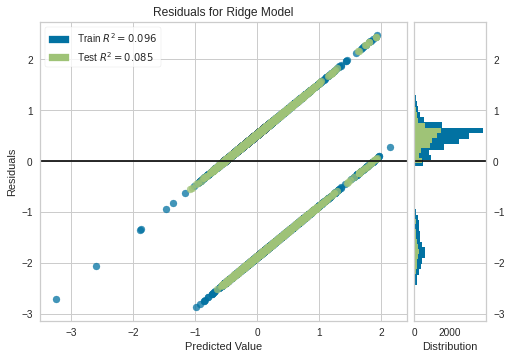

In [11]:
ridge = Ridge()
visualizer = ResidualsPlot(ridge)

visualizer.fit(X_train_scaled, y_train_scaled)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test_scaled)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [12]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9002314909040248, R2: 0.0853119855366874


In [13]:
predictions

array([[ 0.07732253],
       [-0.07386883],
       [-0.00271501],
       ...,
       [ 0.03037143],
       [-0.07425247],
       [-0.51224255]])

In [ ]:
import numpy as np

predictions=np.rint(predictions)
predictions.reshape(-1,1)

In [ ]:
#np.round(arr)

In [15]:
predictions = np.array([np.round(np.absolute(value)) for value in predictions])

In [16]:
from sklearn.metrics import recall_score

In [23]:
print("Recall score:"+ str(recall_score(y_test, predictions, average='micro')))

Recall score:0.7591111111111111
